# Twitter API Configuration

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import os
import json

In [339]:
bearer_token = os.environ['BEARER_TOKEN']

def create_url(tweetIDS):
    ids = "ids=" + tweetIDS
    tweet_fields = "tweet.fields=source,lang,created_at,public_metrics,context_annotations"
    url = "https://api.twitter.com/2/tweets?{}&{}".format(ids, tweet_fields)
    return url


def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2TweetLookupPython"
    return r


def connect_to_endpoint(url):
    response = requests.request("GET", url, auth=bearer_oauth)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()

# Importing Research Data

In [340]:
#Data sourced from: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0182487
df = pd.read_excel('pone.0182487.s003.xlsx')

# Preprocessing

In [341]:
df.head()

,S1 Table - Tweet data and labels,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,We have used the data according to the Twitter...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Tweet id,Label,NaN,NaN
4,732113301144883204,0,NaN,NaN


In [342]:
#Fixing columnns and rows
df = df.drop([0,1,2,3])
df = df.drop(['Unnamed: 2','Unnamed: 3'], axis=1)
df = df.set_axis(['id', 'spam'], axis='columns')
df.head()

,id,spam
4,732113301144883204,0
5,732113301182746624,0
6,732113301145014272,0
7,732113301149089794,0
8,732113301178552320,0


In [343]:
#Checking for missing values
print('Missing Values:\n')
print(df.isna().sum())

Missing Values:

id      0
spam    0
dtype: int64


# Visualization

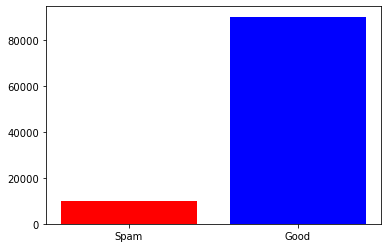

Spam Count: 9945
Good Count: 90055
Spam to Good Ratio: 0.09945


In [344]:
spamCount = df[df['spam']==1].shape[0]
goodCount = df[df['spam']==0].shape[0]

plt.bar(['Spam', 'Good'], [spamCount, goodCount], color=['red', 'blue'])
plt.show()

print('Spam Count:', spamCount)
print('Good Count:', goodCount)
print('Spam to Good Ratio:', spamCount/(spamCount+goodCount))

# Importing Tweets given Research Data

In [345]:
# tweetIDS = []
# temp = ''
# for count, val in enumerate(df['id']):
#     temp = temp + val + ','
#     if count != 0 and count % 99 == 0:
#         temp = temp[:-1]
#         tweetIDS.append(temp)
#         temp = ''

# tweetJSON = []

# for i in tweetIDS:
#     url = create_url(i)
#     json_response = connect_to_endpoint(url)
#     tweetJSON.append(json_response)

# tweetDF = pd.DataFrame(columns=['id', 'lang', 'created_at', 'source', 'text', 'like_count', 'reply_count', 'quote_count'])

# for val in tweetJSON:
#     for i in val['data']:
#         temp = {
#             'id': i['id'],
#             'lang': i['lang'],
#             'created_at': i['created_at'],
#             'source': i['source'],
#             'text': i['text'],
#             'like_count': i['public_metrics']['like_count'],
#             'reply_count': i['public_metrics']['reply_count'],
#             'quote_count': i['public_metrics']['quote_count']
#         }
        
#         tweetDF = tweetDF.append(temp, ignore_index=True)

# tweetDF.to_csv('tweets.csv')

# Combing Tweet Data and Research Data

In [346]:
tweetDF = pd.read_csv('tweets.csv')

tweetDF['id'] = tweetDF['id'].astype(str)
df['id'] = df['id'].astype(str)

data = pd.merge(tweetDF,df, how='inner', on='id')
data.head()

,Unnamed: 0,id,lang,created_at,source,text,like_count,reply_count,quote_count,spam
0,0,732113301182746624,en,2016-05-16T07:39:47.000Z,Tweetbot for iΟS,RT @odinodin: I just made a tool for inspectin...,0,0,0,0
1,1,732113301145014272,en,2016-05-16T07:39:47.000Z,Twitter for Android,HAPPY BIRTHDAY JOSEPH 💓 @JosephMorgan,0,0,0,0
2,2,732113301149089794,en,2016-05-16T07:39:47.000Z,Twitter for iPad,RT @zeecinema: Yeh inka dopahar ka program hai...,0,0,0,0
3,3,732113305376940032,en,2016-05-16T07:39:48.000Z,Twitter for Android,RT @iitian_kshitij: Actually they have become ...,0,0,0,0
4,4,732113305347612672,en,2016-05-16T07:39:48.000Z,Twitter for iPhone,@JaimesonPaul lock all windows and doors don't...,0,1,0,0


# Preprocessing

In [347]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,id,lang,created_at,source,text,like_count,reply_count,quote_count,spam
0,732113301182746624,en,2016-05-16T07:39:47.000Z,Tweetbot for iΟS,RT @odinodin: I just made a tool for inspectin...,0,0,0,0
1,732113301145014272,en,2016-05-16T07:39:47.000Z,Twitter for Android,HAPPY BIRTHDAY JOSEPH 💓 @JosephMorgan,0,0,0,0
2,732113301149089794,en,2016-05-16T07:39:47.000Z,Twitter for iPad,RT @zeecinema: Yeh inka dopahar ka program hai...,0,0,0,0
3,732113305376940032,en,2016-05-16T07:39:48.000Z,Twitter for Android,RT @iitian_kshitij: Actually they have become ...,0,0,0,0
4,732113305347612672,en,2016-05-16T07:39:48.000Z,Twitter for iPhone,@JaimesonPaul lock all windows and doors don't...,0,1,0,0


In [350]:
# data['created_at'] = data['created_at'].astype(str)
# data['created_at'] = data['created_at'].apply(lambda x: x[15:17])
# data

AssertionError: Gaps in blk ref_locs

AssertionError: Gaps in blk ref_locs